In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [83]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [84]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [86]:
df.shape

(195, 24)

In [87]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [88]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [89]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [90]:
column = df.pop('status')

In [91]:
df.insert(23, 'status', column)

In [92]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [93]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [94]:
x = df.drop(columns=['name','status'],axis = 1)
print(x,end='\n\n')
y = df['status']
print(y)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state = 8)

In [96]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (156, 22)
shape of x_test : (39, 22)
shape of y_train : (156,)
shape of y_test : (39,)


In [97]:
from sklearn.preprocessing import StandardScaler #Standardization
func = StandardScaler()
func.fit(x_train)
x_train = func.transform(x_train)
x_test = func.transform(x_test)

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


params = {'C':[1,10,20,30],
          'gamma':[0.0001,0.001,0.01,0.1,1,10,100,1000],
          'tol':[0.0001,0.001,0.01],
          'cache_size':[200,300,400],
          'random_state':[3,5,7,9],
          'kernel':['linear', 'rbf', 'sigmoid']}

gscv_model = GridSearchCV(SVC(),params,cv = 5)

gscv_model.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30], 'cache_size': [200, 300, 400],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'random_state': [3, 5, 7, 9],
                         'tol': [0.0001, 0.001, 0.01]})

In [99]:
print(f'Best parameters:{format(gscv_model.best_params_)}',end = '\n\n')
print(f'Best estimator:{format(gscv_model.best_estimator_)}',end = '\n\n')
print(f'Test score:{format(gscv_model.score(x_test,y_test))}',end = '\n\n')
print(f'Train score:{format(gscv_model.score(x_train,y_train))}',end ='\n\n')

Best parameters:{'C': 10, 'cache_size': 200, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 3, 'tol': 0.0001}

Best estimator:SVC(C=10, gamma=0.1, random_state=3, tol=0.0001)

Test score:0.9230769230769231

Train score:1.0



In [110]:
pred = gscv_model.predict(x_train)
train_acc = accuracy_score(y_train,pred)

print(f'Predictions on the training data:{pred}',end='\n\n')
print(f'Model accuracy on the training data:{train_acc}')

Predictions on the training data:[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1]

Model accuracy on the training data:1.0


In [111]:
test_pred = gscv_model.predict(x_test)
test_acc = accuracy_score(y_test,test_pred)

print(f'Predictions on the testing data:{test_pred}',end='\n\n')
print(f'Model accuracy on the training data:{test_acc}')

Predictions on the testing data:[1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1
 0 1]

Model accuracy on the training data:0.9230769230769231


In [102]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()
model_2.fit(x_train,y_train)

LogisticRegression()

In [103]:
print(f'Test score:{format(model_2.score(x_test,y_test))}',end = '\n\n')
print(f'Train score:{format(model_2.score(x_train,y_train))}',end ='\n\n')

Test score:0.8461538461538461

Train score:0.8910256410256411



In [104]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier(max_depth = 4,criterion='entropy')
model_3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [105]:
print(f'Test score:{format(model_3.score(x_test,y_test))}',end = '\n\n')
print(f'Train score:{format(model_3.score(x_train,y_train))}',end ='\n\n')

Test score:0.8205128205128205

Train score:0.9935897435897436



In [106]:
params = {'min_samples_split':[11,12,15,17],
          'max_features':[0.2,0.25,0.5,'sqrt','log2'],
          'random_state':[9,10,11],
          'max_depth':[4,5,6,9],
          'criterion':['entropy','gini'],
         'splitter':['best','random']}

gscv_model_2 = GridSearchCV(DecisionTreeClassifier(),params,cv = 5)

gscv_model_2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 9],
                         'max_features': [0.2, 0.25, 0.5, 'sqrt', 'log2'],
                         'min_samples_split': [11, 12, 15, 17],
                         'random_state': [9, 10, 11],
                         'splitter': ['best', 'random']})

In [107]:
print(f'Best parameters:{format(gscv_model_2.best_params_)}',end = '\n\n')
print(f'Best estimator:{format(gscv_model_2.best_estimator_)}',end = '\n\n')
print(f'Test score:{format(gscv_model_2.score(x_test,y_test))}',end = '\n\n')
print(f'Train score:{format(gscv_model_2.score(x_train,y_train))}',end ='\n\n')

Best parameters:{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.2, 'min_samples_split': 11, 'random_state': 9, 'splitter': 'best'}

Best estimator:DecisionTreeClassifier(max_depth=4, max_features=0.2, min_samples_split=11,
                       random_state=9)

Test score:0.8974358974358975

Train score:0.9358974358974359



In [108]:
x.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

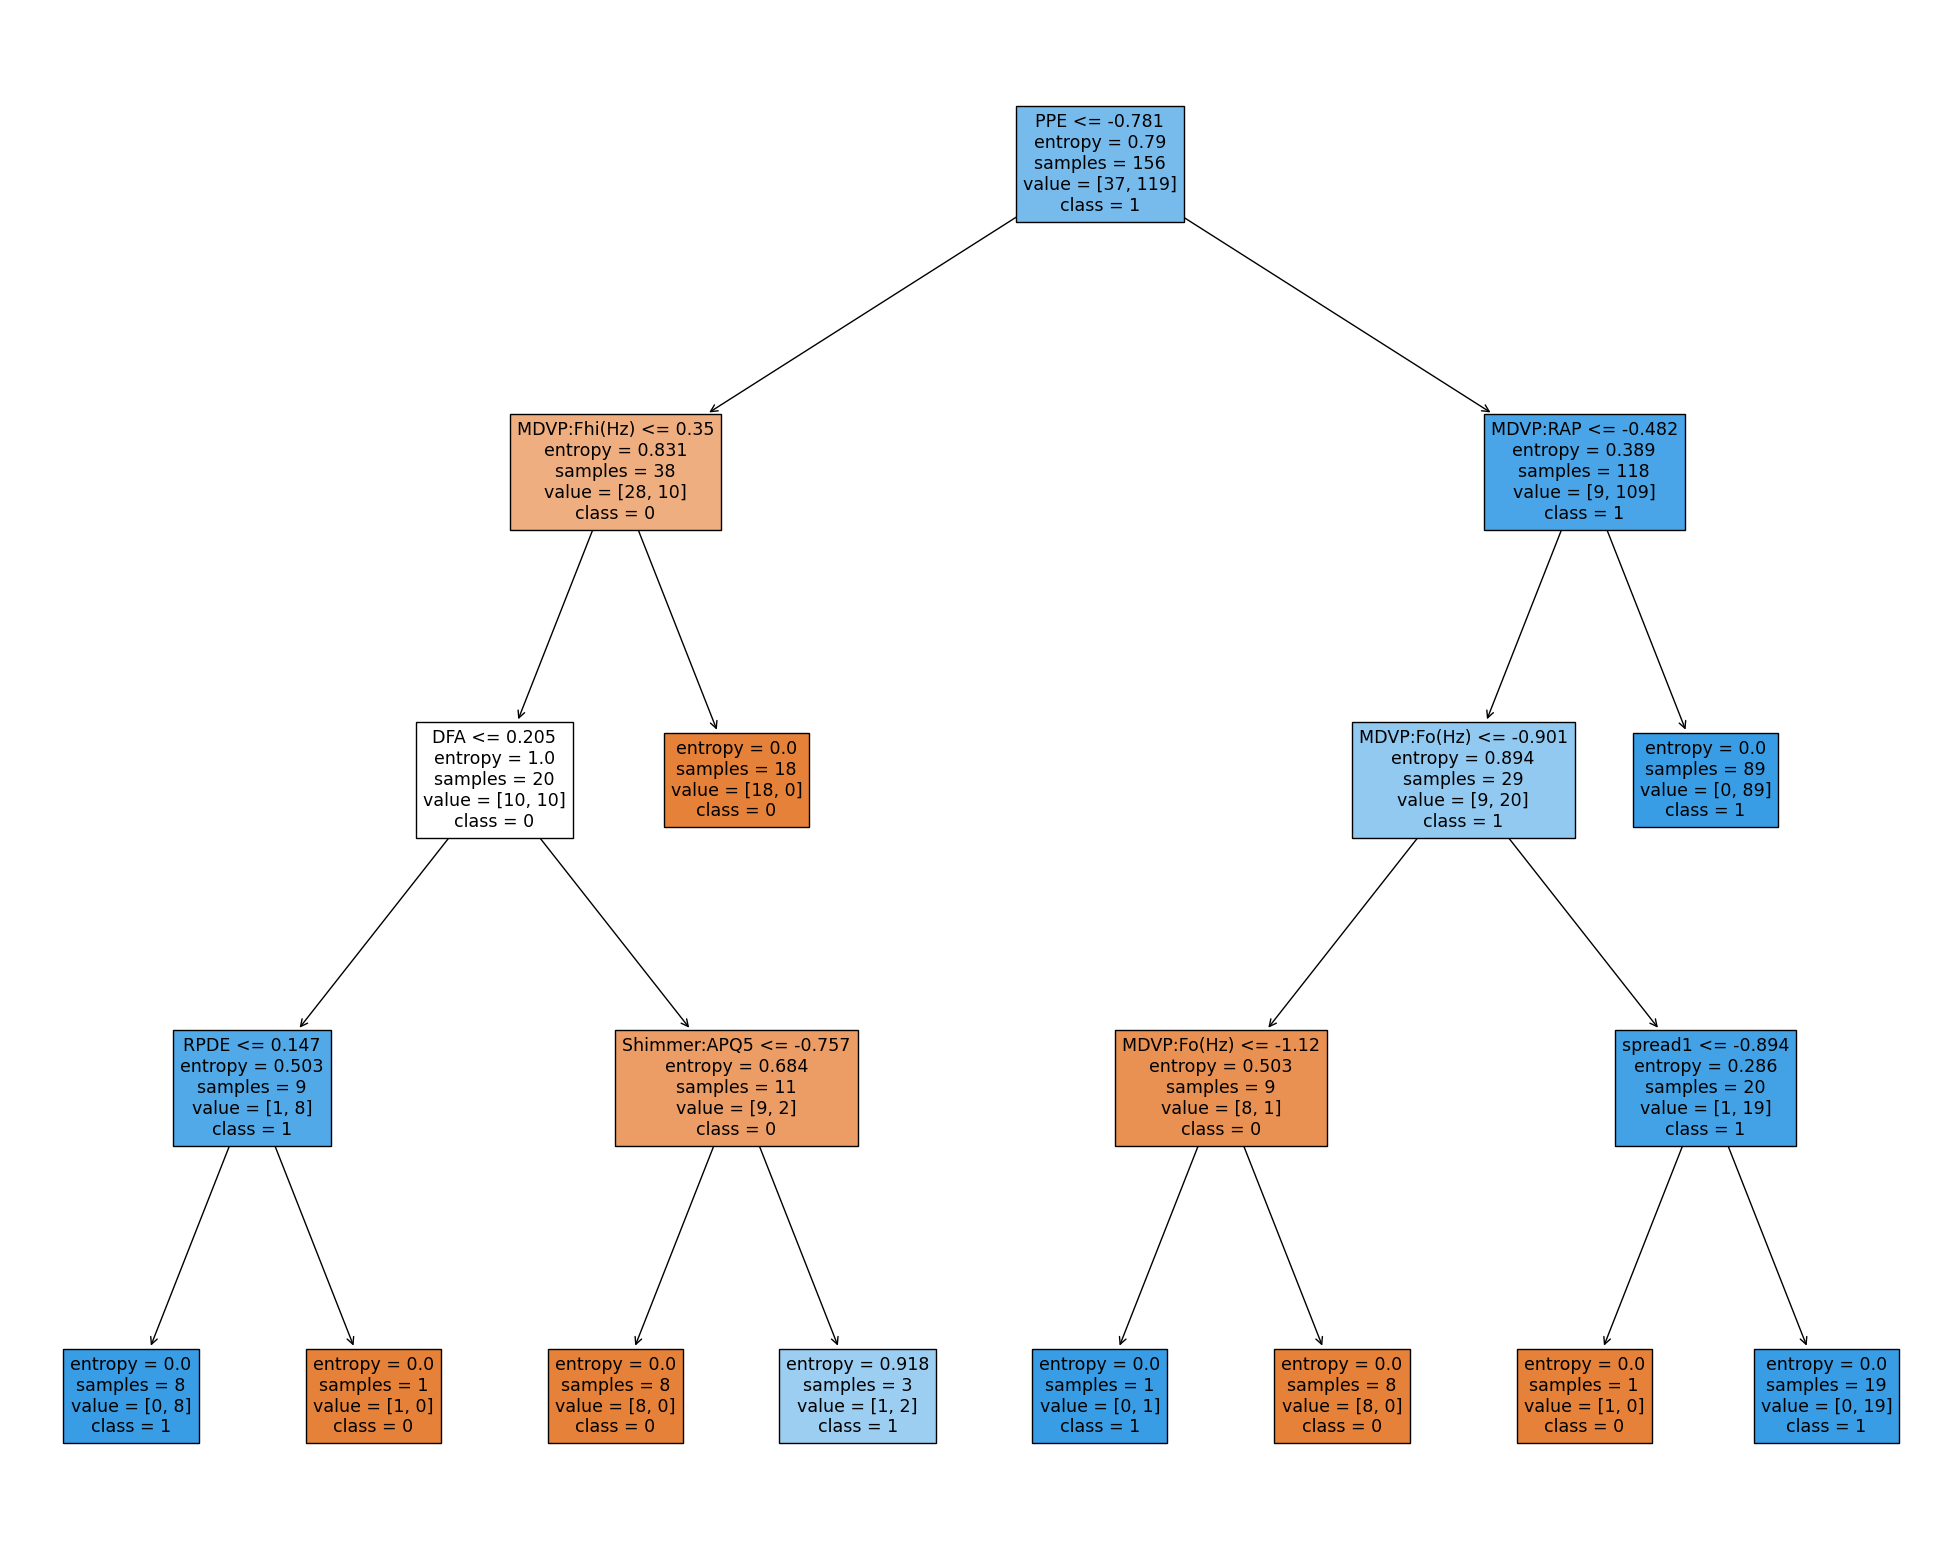

In [109]:
from sklearn import tree 
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_3, 
                   feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],  
                   class_names=['0','1'],
                   filled=True)
